
<style>div.output_area img {max-width: none;}</style>
<font size="5.5"><b>ARBITRARY WAVEFORM GENERATOR MUX AND SIGNAL CONDITIONING</font>


```
SSCS TC-OSE Team, April 2023

```



####**Supervisors**
|Name|Email|Affiliation
|:|:|:----------:|
|Dr. Rashad Ramzan |rashad.ramzan@nu.edu.pk|Fast National Univeristy, Islamabad
|Dr. Hassan Saif |hassan.saif@nu.edu.pk|Fast National Univeristy, Islamabad
|Engr. Hamza Atiq |hmz1075@gmail.com|Fast National Univeristy, Islamabad

<br>
<br>

####**Team Members**
|Name|Email|Affiliation
|:|:--:|:----------:|
|Muhammad Umar (Team Lead)|i229923@nu.edu.pk|Fast National Univeristy, Islamabad
|Saleh Muhammad Sherazi|i229913@nu.edu.pk|Fast National Univeristy, Islamabad
|Bismah Alam|i229903@nu.edu.pk|Fast National Univeristy, Islamabad
|Shahid Mehmood|i229942@nu.edu.pk|Fast National Univeristy, Islamabad



##**Abstract**
This is a proposal for IEEE PICO design contest. Arbitrary Waveform Generator (AWG) Mux and Signal Conditioning is one of the six building blocks of the chip called “lab bench on a chip” system that can be used to characterize basic analog circuit blocks through oscilloscope and waveform generator functionality.The simulations of different modules of AWG MUX & Signal Conditioning i.e. transimpedance stage, buffer, differential op amp with VOCM, low pass filter and differential DEMUX are done using cadence tools (130nm PDK). The required specifications of bandwidth=5.3MHz, slew rate=138MV/s, and AWG load capacitance (C<sub>L</sub>=497 fF) have been efficiently met. The design is based on folded cascode op-amp which have high bandwidth, slew rate and gain. Secondly the basic model of AWG Mux is implemented using open-source tool, Xschem (Skywater 130nm PDK). The next step is to implement this design using the open-source tools (Xschem, Magic) GF MCU 180nm PDK.


**_Key words:_**  _AWG MUX, GF MCU_




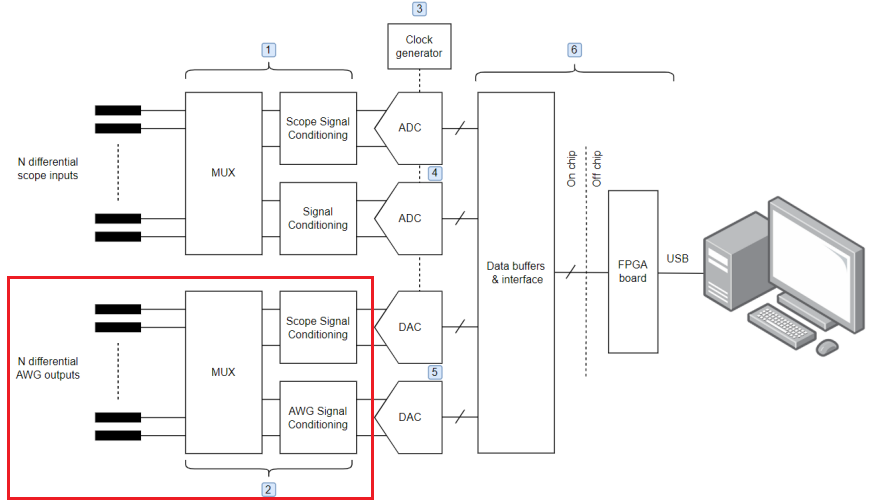


**Figure 1:** Targeted AWG MUX & Signal Conditioning Block


##**Problem Statement & Motivation:**

The purpose is to develop on chip system by drawing some inspiration from a similar PCB based system of Analog Discovery, AWG Mux is part of this "lab bench on a chip" system. It consists of DAC that convert digital signals from ADC or FPGA to Analog, I/V block convert current from DAC to differential voltage, analog output channels act as an Arbitrary Waveform Generator. AWG will allow the macro’s user to direct the DAC resources to the number of different test points within DUT.  

##**Target Specifications**

<table>
**Table 1:** Target Specifications


|Specification|Target|
|:|:|
|AWG Load Capacitance|&lt; 10pF|
|No of Differential Input Channels|&ge; 8|
|Bandwidth|5MHz(DAC's Nyquist bandwidth|
|Slew Rate|Vpeak.2*pi*BW=94MV/s|
|Output Noise|&lt; 20nV/rt-Hz|
</table>


##**Proposed Design Stages/Blocks:**
1. Op Amp Designing 
2. Transimpedance (I-V) stage
3. Buffer 
4. Differential Op Amp 
5. Differential DEMUX (1X8)




###**Block Diagram**



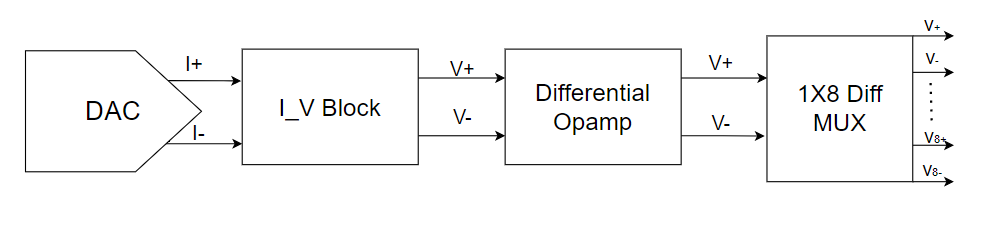


**Figure 2:** Proposed Block Diagram 


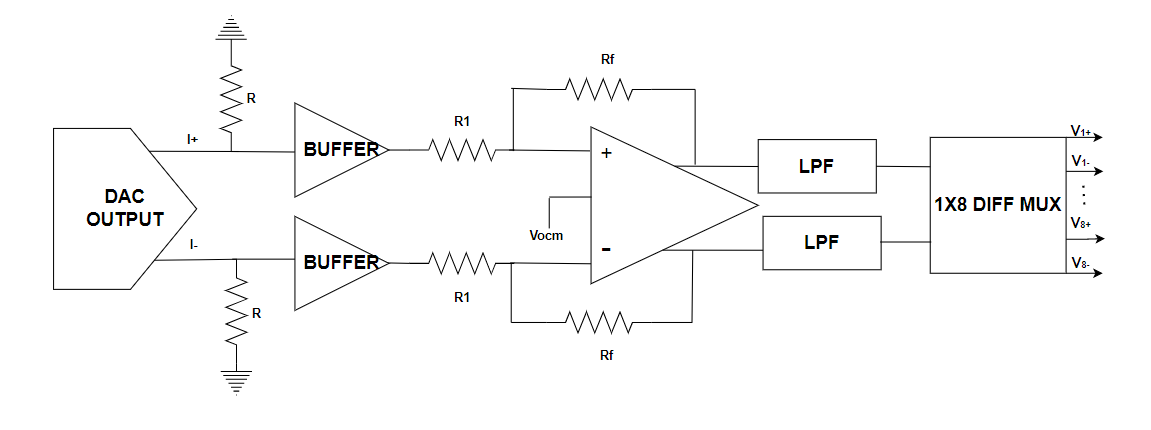

**Figure 3:** Proposed Circuit Diagram  



#**I. Op Amp Designing:** 

Op Amp design was a challenging task to meet the required specifications. Folded Cascode Op Amp having full output swing is used to meet the specifications of Bandwidth, Slew Rate and gain. 




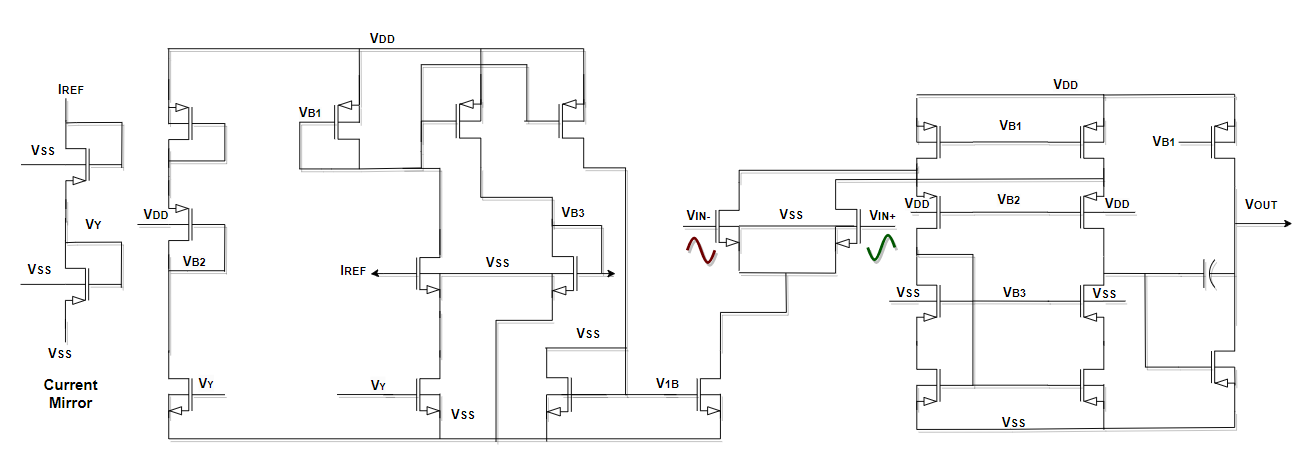


**Figure 4:** Folded Cascode Op-Amp  




**Table 2:** Opamp Block Features 



  |Name|Value|
|:|:|
|Gain|96.94 dB|
|GBW|127 MHz|
|Slew Rate |138.3 MV/s|



###**Corner Analysis of Op-Amp:** 
Folded Cascode op-amp corner analysis is done. Fig. 5 shows gain and phase of folded cascode op-amp at corners.





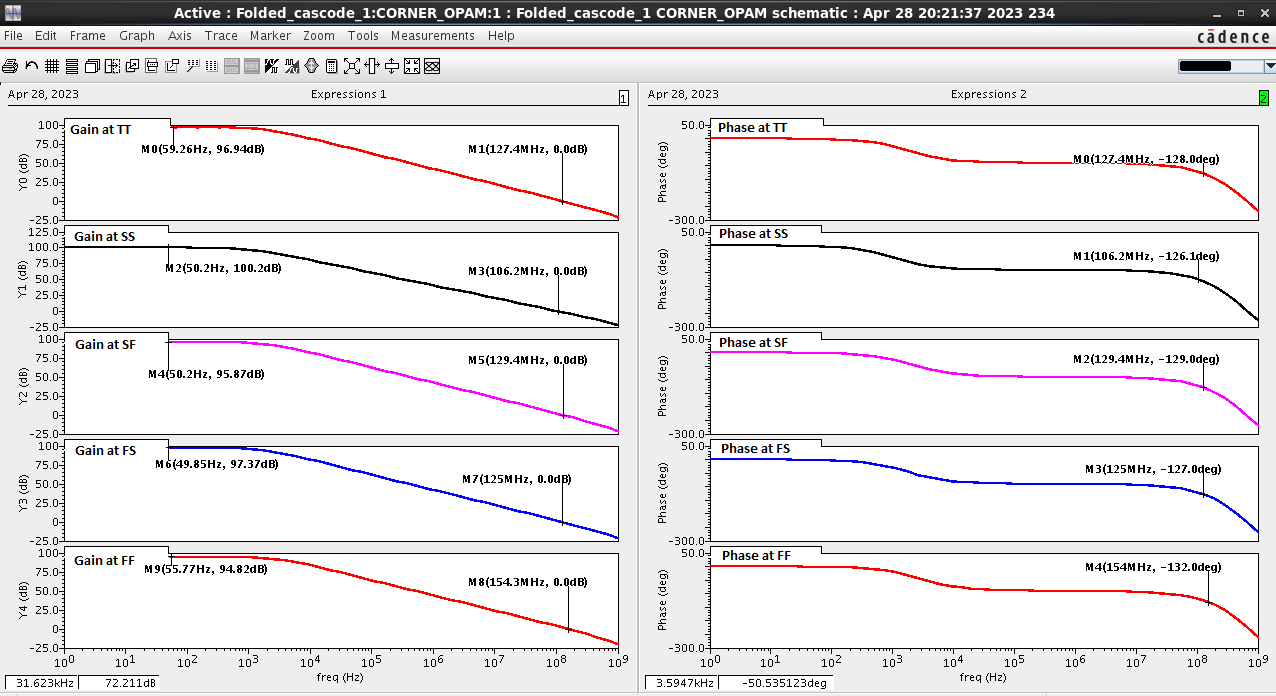


**Figure 5:** Gain & Phase of Op-Amp at Corners 



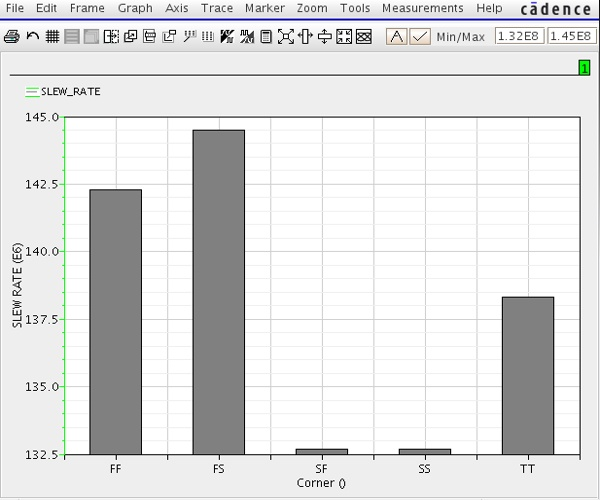


**Figure 6:** Slew Rate of Op-Amp at Corners 


Fig. 6 shows slew rate of op-amp at TT, SS, FF, SF and FS corners.


#**II. I/V Block (Transimpedance Stage):**

10-bit DAC will provide Differential output currents that will be fed to I/V. IPWL current source is used to model differential current from AWG DAC. Bandwidth is greater than 10MHz (should be >=5MHz; Nyquist rate of DAC). First block is I/V block that is used to convert Differential Current into Differential Voltages.Fig. 7 shows current to voltage conversion by multiplication with resistance of 100Ω.


#**III. Buffer**
Buffer is used to avoid loading of next stage, it ensures that signals are transmitted accurately and reliably from I-V stage to diff Op-Amp stage without distortion, attenuation or interference.Buffer is shown in Fig. 7.





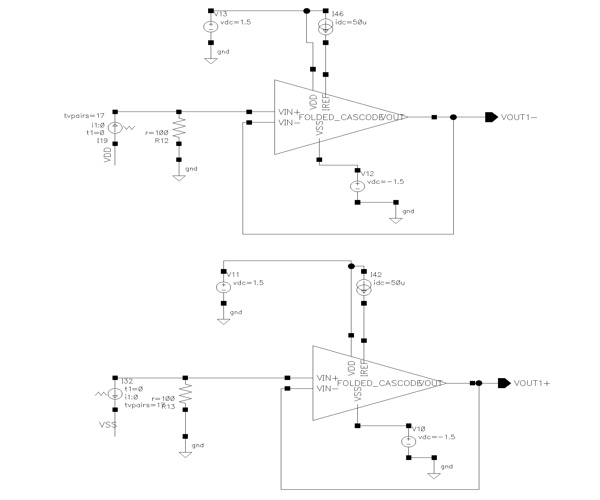


**Figure 7:**  Transimpedance Stage (I-V Block) 


        




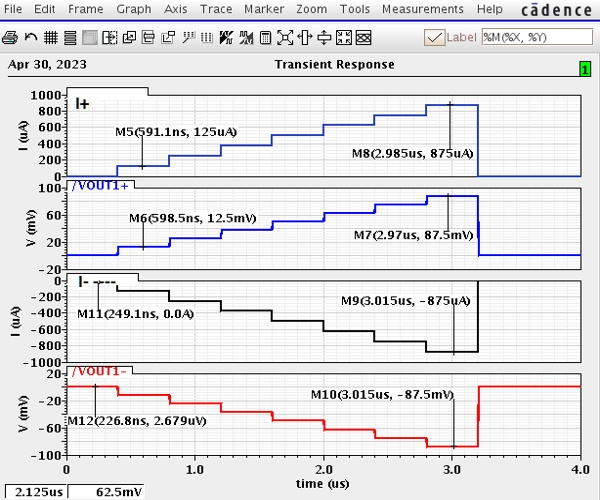


**Figure 8:** Transient Response of Transimpedance Stage (I-V Block)



 




#**IV. Differential Op-Amp\:**

Differential operational amplifier is used to take a gain of 10 and common mode output can be adjusted as per requirement. Low Pass Filter designed at corner frequency of 5MHz (Nyquist rate of DAC) is part of this block. Low pass filter is used to filter high frequency components.
 
<bv>


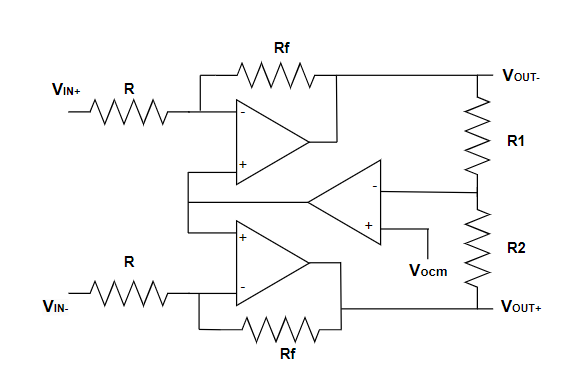


**Figure 9a:** Differential Opamp



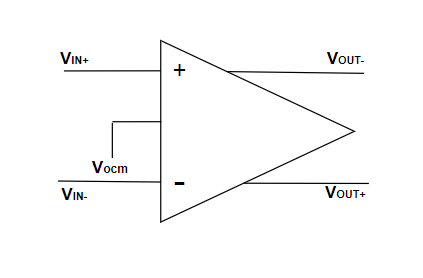




**Figure 9b:** Differential Opamp Symbol




**Table 3:** Diff Opamp Features 



  |Name|Value|
|:|:|
|Gain |20 dB|
|GBW |101.6 MHz|
|BW @ 3dB|10.5 MHz|
|V <sub>ocm<sub> |Adjustable| 




 Fig. 10 shows frequency response of differential op-amp having gain of 10.







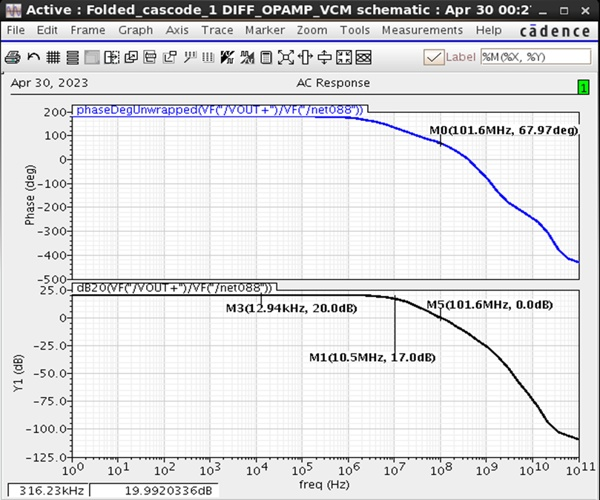



**Figure 10:** Differential Op-Amp Frequency Response (Gain=10)



 Fig.11 shows transient response of differential op-amp with V<sub>OCM </sub>(output common mode) =100mV.








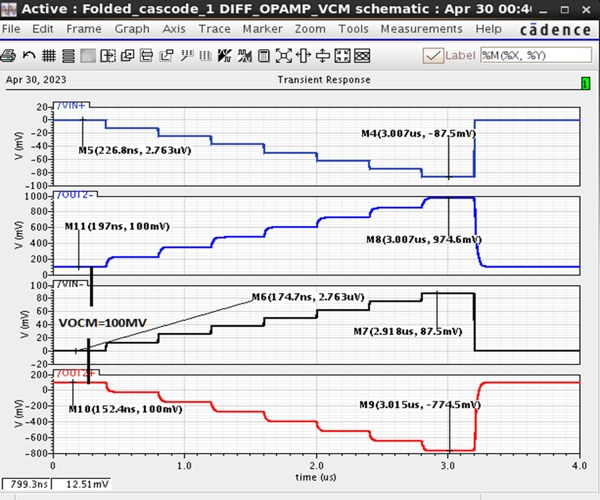



**Figure 11:** Differential Op-Amp Transient Response (Gain=10 & V<sub>OCM</sub>=100mV)




#**V. Differential DEMUX (1X8):**

Output mux is actually a DEMUX which is the final block and will transmit the input signal to one (1) of eight (8) differential channel. The selection of the channel will be decided based on the selection bits from the interface block.

The basic component used for the DEMUX is transmission gate shown in below figures which have been built in cadence virtuoso and have full swing of output.



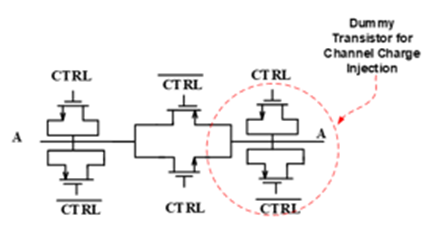



**Figure 12a:** Transmission Gate Circuit 


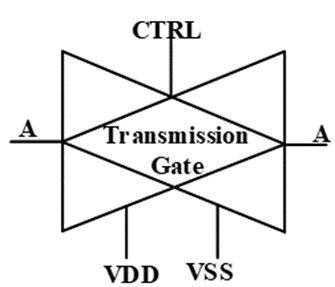



**Figure 12b:** Transmission Gate Symbol 







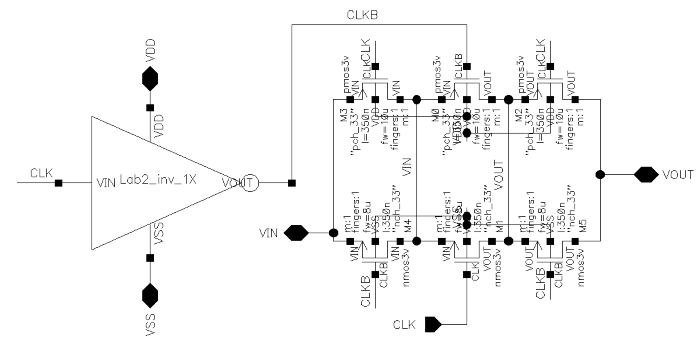


**Figure 12c:** Transmission Gate Schematic


 **Resistance of Transmission Gate:**

The transmission gate is formed by the parallel combination of NMOS and PMOS. When the input voltage is near VSS the PMOS is in operating condition and when the Vin is closed to VDD then NMOS operates. 

The effective resistance of transmission gate is the parallel combination of the on resistance of PMOS and NMOS is shown in fig.13. 




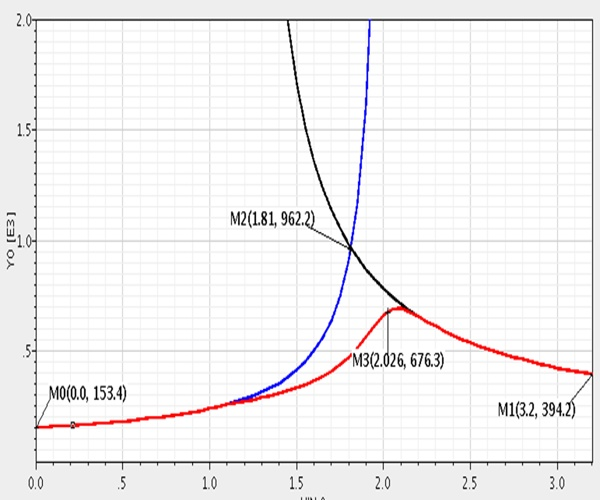





**Figure 13:** Ron of Transmission Gate




By the combination of the transmission gate, the DEMUX is formed as shown in the fig. 14


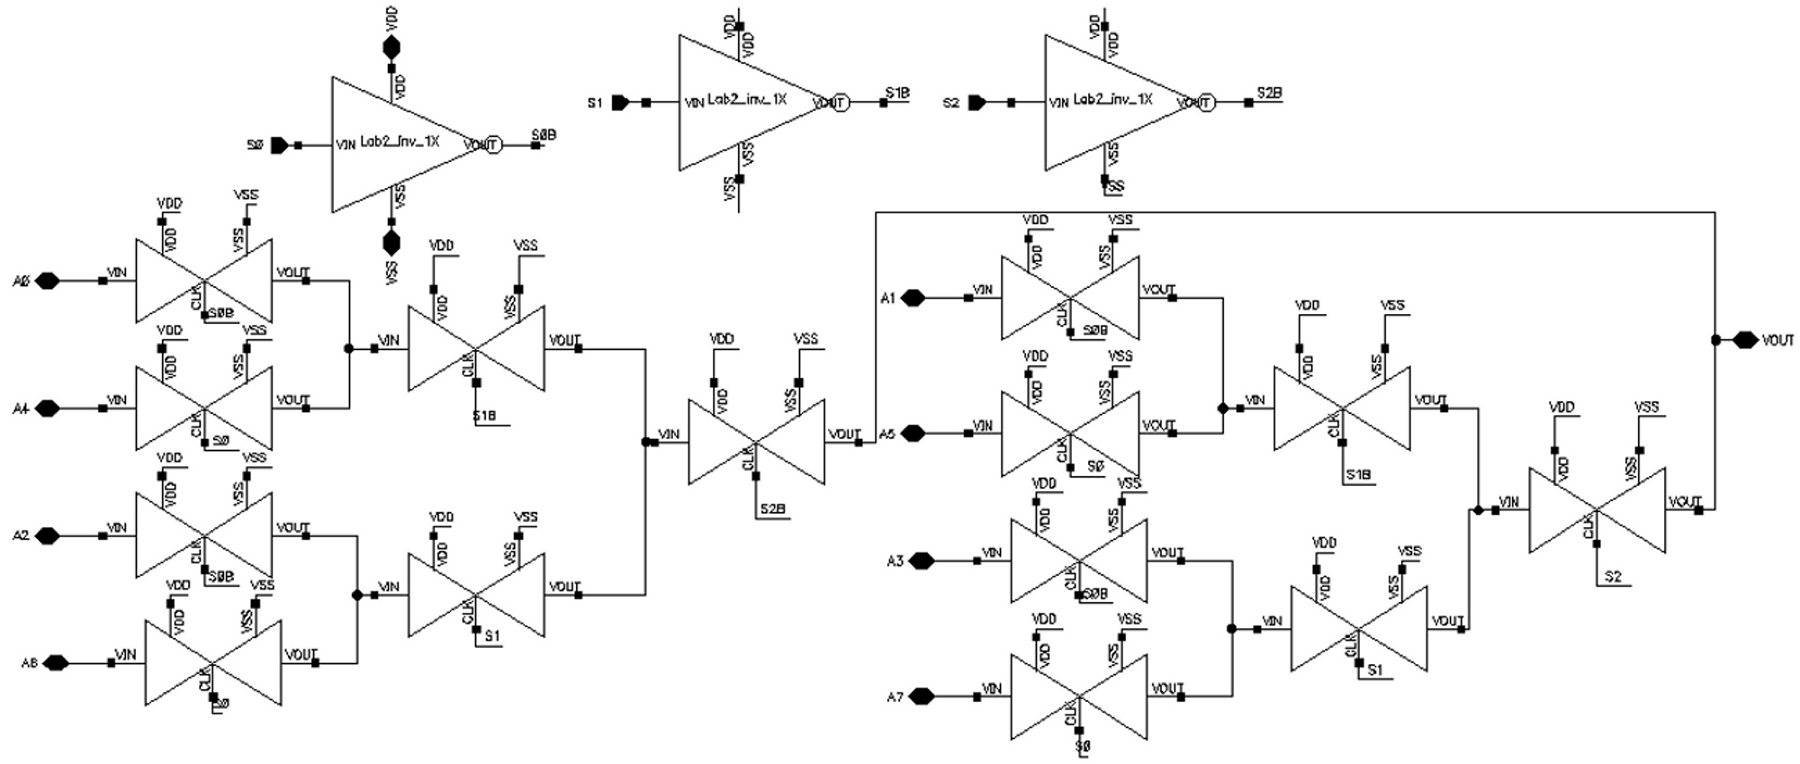


**Figure 14:** DEMUX 1X8


The 1X8 DEMUX is single ended, to make it differential two DEMUX are used in parallel as shown in fig.15. 






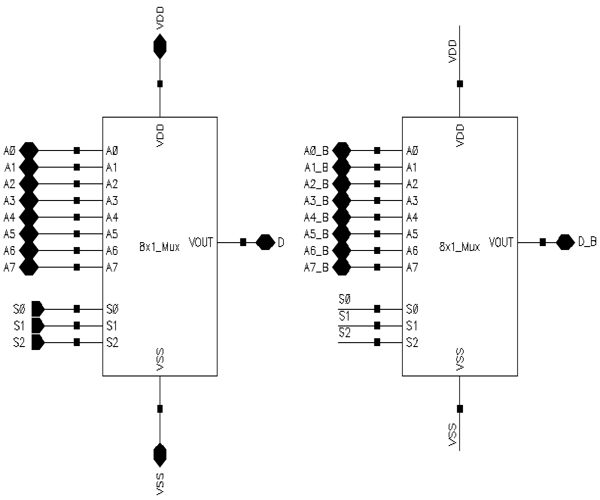



**Figure 15:** Differential DEMUX (1X8)


**Loading of DEMUX:**

Loading is important parameter of any block, which decides the strength of driving device. Loading of DEMUX is calculated by inserting the resistance in signal path and applied a step input, calculated the time for output to reach the 63 % of final value as shown in fig.16. From time with the help of formula  τ=RC, the value of C can be calculated which is the required loading.






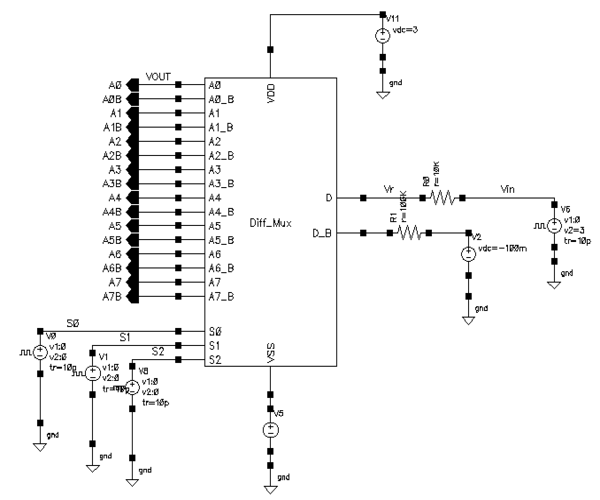



**Figure 16a:** Loading of Differential DEMUX (C<sub>L</sub>)





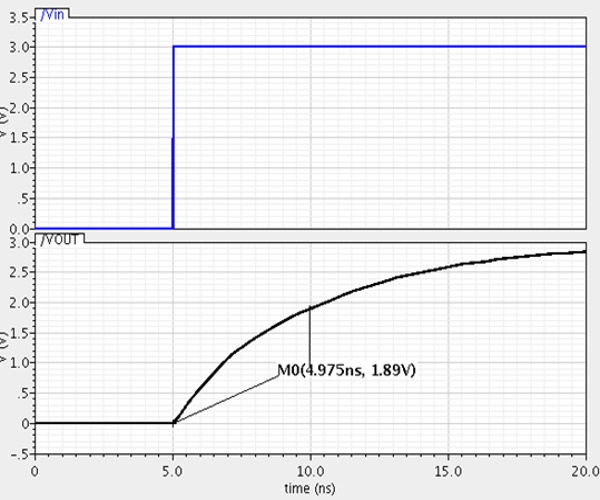





**Figure 16b:**  Simulation Result to show Loading of Differential DEMUX (C<sub>L</sub>)


<br>
As  τ=RC and the resistance value is 10K ohms.
<br>
4.975n=10K X C
<br>
C<sub>L</sub>=497 fF








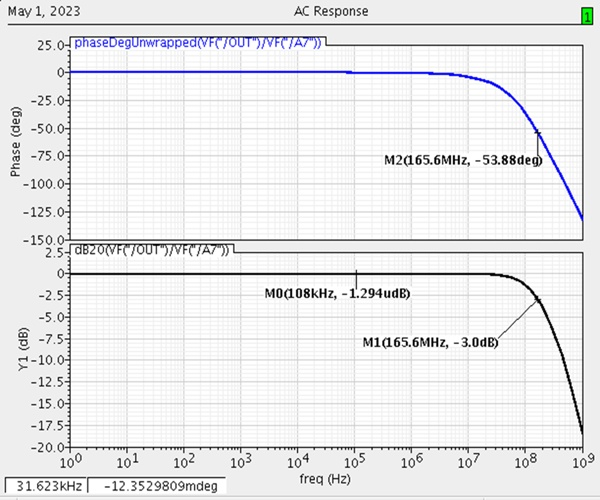




**Figure 17:** Frequency Response of Differential DEMUX 





**Table 4:** DEMUX(1X8) Features 


  |Name|Value|
|:|:|
|Resistance Ron|300 &ohm;|
|Capacitance C<sub>L |497 pF|
|GBW|165.6 MHz|
|Gain|0dB|
|Output Swing|Rail to Rail| 



#**Combined Simulations & Results:**



#**Cadence Simulations (130nm)**
Complete simulations setup of AWG MUX & Signal Conditioning modules i.e. IV-block (transimpedance stage), buffer, differential op amp with V<sub>OCM</sub> , low pass filter and differential DEMUX is shown in fig. 18.



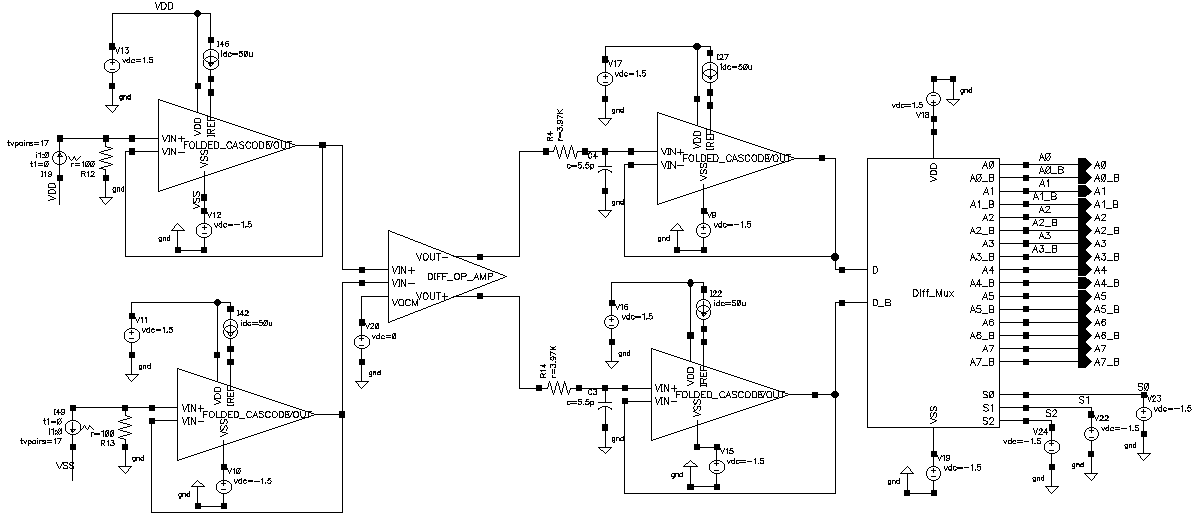









**Figure 18:** Combined Setup of AWG MUX & Signal Conditioning




Transient Response of AWG MUX & Signal Conditioning setup for combined simulation is shown in fig. 19. with V<sub>OCM</sub> is equal to 50mV.







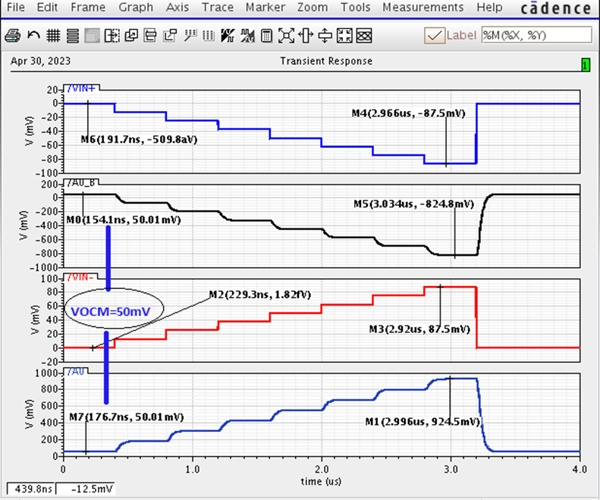



**Figure 19:** Transient Response of AWG MUX & Signal Conditioning (V<sub>OCM</sub>=50mV)



Frequency Response of AWG MUX & Signal Conditioning complete setup with gain of 20dB and bandwidth of 5.3MHz is shown in fig. 20.




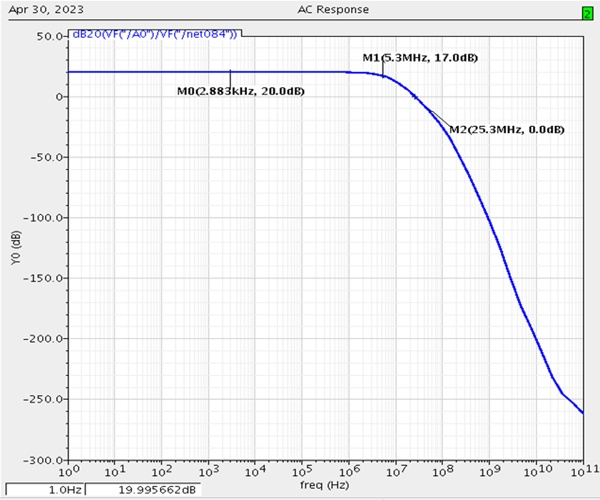



**Figure 20:** Frequency Response of AWG MUX & Signal Conditioning









**Table 5:** Complete AWG Mux Block Features  

|Name|Value| 
|:|:|
| Gain|20dB |
|GBW|25.3MHz|
|BW@3dB|5.3MHz|
|C<sub>L|497 fF|



#**Open Source Tool Simulations (Skywater 130nm):**

A basic model of AWG MUX and Signal conditioning is implemented using open source tool (Skywater 130nm PDK). The first stage is I/V (transimpedance) block followed by buffer, differential Op-Amp with adujtable common mode output, low pass filter and differential mux as shown in fig. 21. Output of I/V block is shown in fig. 22. Simulation results of basic AWG block is shown in fig. 23 with gain of 2 and 50mV common mode output.  




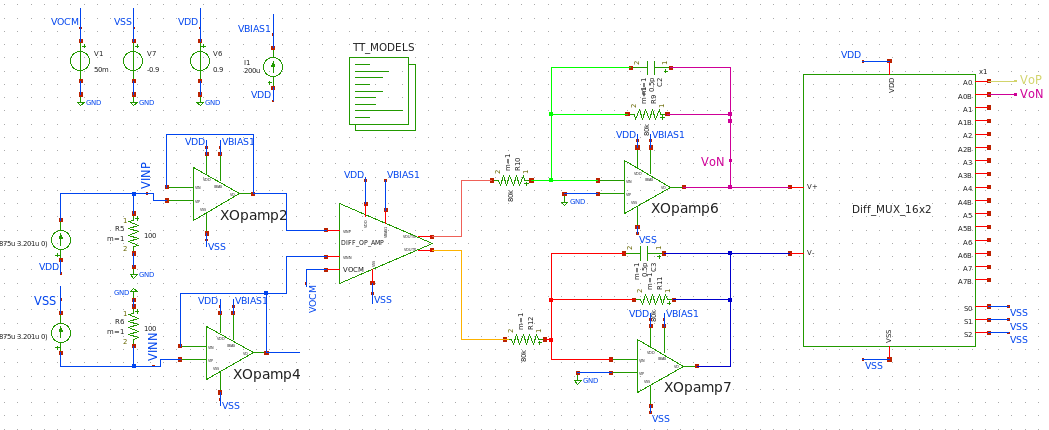


**Figure 21:** Combined Schematic (Skywater 130nm)





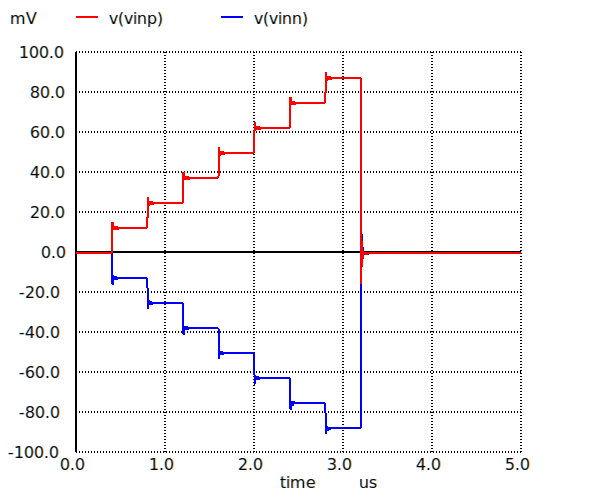


**Figure 22:** I/V Block Output





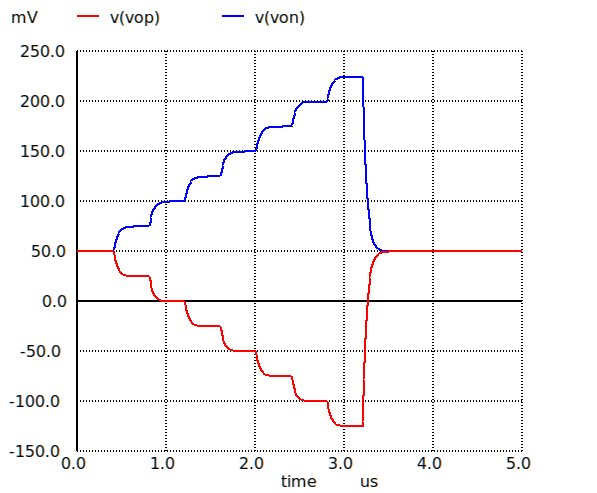


**Figure 23:** Output of Basic AWG MUX Model (skywater 130nm)


### **Conclusion & Future Work:**

AWG Mux and Signal Conditioning which is one of the six building blocks of the chip (proposed for PICO contest) is simulated using IC design tool Cadence (130nm PDK). Initially specifications of separate blocks were meet and finally all blocks are combined & simulations are done. The required results (Bandwidth, Gain, Load capacitance and slew rate) are achieved and are shown in Table 05. A basic model of AWG Mux is also implemented using open-source tool (Skywater 130nm PDK).

This design will be implemented using the open-source GF MCU 180nm PDK, which will be a pilot effort towards maturity of open-source tools.


###**References**
[1] S. Mallya and J. H. Nevin, "Design procedures for a fully differential folded-cascode CMOS operational amplifier," in IEEE Journal of Solid-State Circuits, vol. 24, no. 6, pp. 1737-1740, Dec. 1989, doi: 10.1109/4.45013. <br>

[2] K. Nakamura and L. R. Carley, "An enhanced fully differential folded-cascode op amp," in IEEE Journal of Solid-State Circuits, vol. 27, no. 4, pp. 563-568, April 1992, doi: 10.1109/4.126544. <br>

[3] Texas Instruments, “High speed CMOS logic analog multiplexers/demultiplexers,” 74HC4051 datasheet, Nov. 1997 [Revised Sept. 2002]. <br>

[4] Texas Instruments, “ADC Driver Reference Design Improving Full-Scale THD Using Negative Supply,” TIDUCK3A datasheet, Dec 2016 [Revised March 2017]. <br>

[5] Analog Devices, “Differential Drivers for High Speed ADCs Overview,” MT-075 datasheet.
[6] Walter G. Jung, Op Amp Applications, Analog Devices, 2002, ISBN 0-916550-26-5, Also available as Op Amp Applications Handbook, Elsevier/Newnes, 2005, ISBN 0-7506-7844-5. Chapter 3. <br>

[7] Walt Kester, High Speed System Applications, Analog Devices, 2006, ISBN-10: 1-56619-909-3, ISBN-13: 978-1-56619-909-4, Chapter 2.
